# Notes on Chapters 1 - 3 in Sutton RL book

## Chapter 1

The following is my summary and paraphrasing of Chapter 1 in Sutton and Barto's Reinforcement Learning: An Introduction

### 1.1

"Reinforcement learning is learning what to do - how to map situations to actions - so as to maximize a numerical reward signal." For tic-tac-toe this would be something like learning how to take actions to maximize a win rate.

"A learning agent must be able to sense the state of its environment to some extent and must be able to take some actions to affect the state." In terms of tic-tac-toe this means the agent needs to be able to observe the state of the board and it needs to be able to place Xs and Os where it chooses.

"The agent must have a goal or goals relating to the state of the environment"; here the goal would be to win.

"Exploration vs Exploitation - To get a lot of reward, an agent has to use actions it has used in the past that it knows produces reward, but to find reward giving actions, an agent must try actions its never tried before. So the agent has to try a variety of actions and progressively favor those that appear best." In tic-tac-toe this could be equivalent to continually trying new moves in hopes of uncovering a better strategy than what has already been found.

### 1.3

4 main subelements of a reinforcement learning system:
    - Policy
    - Reward signal
    - Value function
    - Environment model (optional)

"Policy describes the learning agent's way of behaving at a given time, it provides a mapping from the state of the environment to what action to take in that state." In tic-tac-toe, the policy would describe what move to make depending on the state of the board.

"The reward signal defines the goal in an RL problem." At each time step, the environment sends a reward value to the agent. The agent's goal is to maximize the reward it receives over long period of time. In tic-tac-toe, the reward could come from winning, so the agent would want to make moves that are winning moves so that it can receive more reward.

"Since the reward signal operates at each time step, it is a short-term value; the value function declares what is good in the long run." The value of a state is the total reward an agent can expect to gather over the future, starting with that state. Values indicate the long-term desirability of states, taking into account the states that are likely to follow, and the available reward in those states. In tic-tac-toe, a high value move might be one that likely leads to a winning sequence of moves.

"When we are making action choices, we use values as judgment, not rewards." We want actions that yield the highest value, not the highest reward, because these are the best actions over the long run. It's much harder to determine values than rewards; rewards are given to us by the environment, while values must be estimated using an agent's past experiences and observations. 

"The model of the environment mimics the environment, or it allows inferences to be made about how the environment will behave." i.e. given a state and action, a model might be able to predict the next state and reward. We use models for planning. In tic-tac-toe, this might mean a model of the board and the other player where a move can be made in the model and the model tries to return a prediction of the opponents responding move and the reward from that next state.

### 1.5

Tic-tac-toe example. 

Let's consider draws and losses to be equally bad. How can we build a player that will find the imperfections in its opponent's play and learn to maximize its chances of winning?

This can't be solved readily through classical techniques. The minimax solution from game theory doesn't work because it asssumes a particular way of playing by the opponent, and something like dynamic programming requires as input complete specifications of the opponent, including the probabilities of each move the opponent could make in each board state. 

We could play lots of games against the opponent and learn some model of the opponents behavior, and then apply dynamic programming to those estimated move probabilities from the model to compute the optimal moves.

An evolutionary method would search the space of possible policies for one with a high probability of winning against the opponent. In this case, the policy is a rule that tells the player what move to make for every state of the game.

Tic-tac-toe with method making use of a value function:

We set up a table of numbers, one for each state of the game. Each number is the latest estimate of the probability of winning from that state. This estimate is considered the state's value, and the whole table is the learned value function. 

If we are playing X's, then each state where there are 3 X's in a row has a probability of 1, since we've already won, and each state where there are 3 O's in a row or the board is full has a probability of 0, since we've either lost or drawn and we can't win from that state. Make the initial values of all other states .5, to guess an initial 50% probability of winning.

Play lots of games against the opponent. To pick our next move we look at the states that would result from each possible move and check the corresponding win probability in the table. Most often we move greedily, picking the move that leads to the state with the highest value. But sometimes we randomly select a move from the table, and these are our exploratory moves, which allow us to see states that we might otherwise never find. 

While playing, we change the values of the states we wind up in. We try to make them more accurate estimates of the probability of winning. The current value of the earlier state is updated to be closer to the value of the later state. This is done by moving the value of the earlier state a fraction of the way towards the value of the later state.
    - Let s be the state before the greedy move
    - s' is the state after the greedy move
    - V(s) is the update to the estimated value of s
    - alpha is learning rate
    
V(s) <-- V(s) + alpha * [V(s') - V(s)]

This update rule is an example of temporal difference learning, because its changes are based on a difference at two different times (V(s') - V(s)).

If alpha is reduced to zero over time, this method converges for any fixed player to the true probabilities of winning for any given state, given optimal play by the method. If alpha isn't reduced all the way to zero over time, then this method also plays well against players that slowly change their style of playing.

## Tic-tac-toe code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# for search, use current state and pretend to place an X in every available spot, then, retrieve the value for each resulting fake state

# for generating the dataframe
# use the 9 nested for loops 
# at each step, check to make sure the generated row is legal
# write a function stating whether the game was won by X or O or drawn and then return 0, .5 or 1. Use this to build the value table
class tictactoe:
    def __init__(self):
        self.x_win = False
        self.o_win = False
        self.game_over = False
        self.v = dict()
        self.chars = [0, 1, 2]
        
    def gen_state_arr(self):
        # 0 is empty, 1 is X, 2 is O
        arr = []
        for i in range(3):
            for j in range(3):
                for k in range(3):
                    for t in range(3):
                        for u in range(3):
                            for s in range(3):
                                for q in range(3):
                                    for y in range(3):
                                        for z in range(3):
                                            tmp = np.array([self.chars[i], self.chars[j], self.chars[k], self.chars[t], self.chars[u], self.chars[s],
                                                       self.chars[q], self.chars[y], self.chars[z]]).reshape(3, 3)
                                            if self.check_legal(tmp) == True:
                                                arr.append(tmp)
                                                
        return np.asarray(arr)
        
    def gen_value_arr(self, state_arr):
        vals = []
        for i in range(len(state_arr)):
            value = self.check_over(state_arr[i])
            vals.append(value)
        vals = np.asarray(vals)
        vals = vals[vals < 3]
        return vals
    
    def check_legal_doesntwork(self, state):
        x_count, o_count, empty_count = 0, 0, 0
        state_cpy = np.copy(state).ravel()
        for i in range(len(state_cpy)):
            if state_cpy[i] == 1: x_count += 1
            elif state_cpy[i] == 2: o_count += 1
            elif state_cpy[i] == 0: empty_count += 1
        
        if x_count - o_count > 1:
            return False
        
        if self.check_over(state) is 1 and x_count == o_count:
            return False
        
        if self.check_over(state) is 0 and x_count != o_count:
            return False
        
        if o_count > x_count:
            return False
        
        if self.check_over(state) is 3:
            return False
        
        return True
    
    def check_legal(self, state):
        x_count, o_count, empty_count = 0, 0, 0
        state_cpy = np.copy(state).ravel()
        for i in range(len(state_cpy)):
            if state_cpy[i] == 1: x_count += 1
            elif state_cpy[i] == 2: o_count += 1
            elif state_cpy[i] == 0: empty_count += 1
        
        if x_count == o_count + 1 or x_count == o_count:
            # check for X and O win
            if self.check_over(state) == 3:
                return False
            # check for O win and num Xs = num Os
            if x_count != o_count and self.check_over(state) == 0:
                return False
            # check for X win and num Xs = num Os + 1
            if self.check_over(state) == 1 and x_count != o_count + 1:
                return False
            return True
        return False

        
    def check_over(self, state):
        x_vec = np.ones(3, dtype=int)
        o_vec = np.full(3, 2, dtype=int)
        x_win, o_win = 0, 0
        
        state_diag = np.diag(state).astype(int)
        state_rev_diag = np.fliplr(state).diagonal().astype(int)
        
        if np.array_equal(state_diag, x_vec) or np.array_equal(state_rev_diag, x_vec):
            x_win += 1
        
        if np.array_equal(state_diag, o_vec) or np.array_equal(state_rev_diag, o_vec):
            o_win += 1
        
        cols = [state[:, 0].astype(int), state[:, 1].astype(int), state[:, 2].astype(int)]
        rows = [state[0, :].astype(int), state[1, :].astype(int), state[2, :].astype(int)]
        
        for i in cols:
            if np.array_equal(i, x_vec):
                x_win += 1
            elif np.array_equal(i, o_vec):
                o_win += 1
        
        for i in rows:
            if np.array_equal(i, x_vec):
                x_win += 1
            elif np.array_equal(i, o_vec):
                o_win += 1
        
        if x_win >= 1 and o_win == 1:
            return 3
        elif x_win >= 1:
            return 1
        elif o_win == 1:
            return 0
        else:
            return 0.5
    
    def human_viz(self, state):
        tmp_board = np.empty(state.shape, dtype=str)
        for i in range(len(state)):
            for j in range(len(state[i])):
                if state[i][j] == 1:
                    tmp_board[i][j] = 'X'
                elif state[i][j] == 2:
                    tmp_board[i][j] = 'O'
                elif state[i][j] == 0:
                    tmp_board[i][j] = '-'
        print(tmp_board)
        
    def find_next_move(self, state_arr, state, player):
        tmp_states = []
        inds = []
        if player is 1:
            for i in range(len(state)):
                for j in range(len(state[i])):
                    tmp = np.copy(state)
                    if tmp[i][j] == 0:
                        tmp[i][j] = 1
                        tmp_states.append(tmp)
            
            for i in range(len(tmp_states)):
                for j in range(len(state_arr)):
                    if np.array_equal(tmp_states[i], state_arr[j]):
                        inds.append(j)
            return inds
        
        if player is 2:
            for i in range(len(state)):
                for j in range(len(state[i])):
                    tmp = np.copy(state)
                    if tmp[i][j] == 0:
                        tmp[i][j] = 2
                        tmp_states.append(tmp)
                        
            for i in range(len(tmp_states)):
                for j in range(len(state_arr)):
                    if np.array_equal(tmp_states[i], state_arr[j]):
                        inds.append(j)
            return inds
        
    def get_current_state_index(self, state, state_arr):
        for i in range(len(state_arr)):
            if np.array_equal(state_arr[i], state):
                return state, i
        return 'Current state invalid.'
    
    def human_play(self, state_arr, td_values, agent):
        state = state_arr[0]
        iter_count = 0
        while self.check_over(state) == 0.5 and iter_count <= 8:
            cur_state_ind = self.get_current_state_index(state, state_arr)
            if iter_count % 2 == 0:
                move_inds = self.find_next_move(state_arr, state, 1)
                new_move_ind = agent.get_move_update_values(move_inds, cur_state_ind[1], .1)
                state = state_arr[new_move_ind]
            else:
                self.human_viz(state)
                move_valid = False
                while move_valid == False:
                    human_move = input('Input your move coordinates, separated by a comma: ')
                    coord_1, coord_2 = int(human_move[0]), int(human_move[-1])
                    if state[coord_1, coord_2] != 0:
                        print('Invalid move, try again.')
                        pass
                    tmp_state = np.copy(state)
                    tmp_state[coord_1, coord_2] = 2
                    if self.check_legal(tmp_state) == True:
                        state = tmp_state
                        move_valid = True
            
            iter_count += 1
        self.human_viz(state)


In [59]:
ttt = tictactoe()

In [60]:
arr = ttt.gen_state_arr()

In [61]:
vals = ttt.gen_value_arr(arr)

In [62]:
st = arr[2023]
ttt.find_next_move(arr, st, 2)

[3241, 2486, 2188, 2083, 2045, 2031, 2026, 2024]

In [63]:
tmp = arr[2277]
np.array_equal(np.full(3, 2, dtype=int), tmp[1, :])

True

In [64]:
arr[2277]

array([[1, 0, 0],
       [2, 2, 2],
       [0, 1, 1]])

In [65]:
arr[2276]

array([[1, 0, 0],
       [2, 2, 1],
       [2, 1, 1]])

(array([   0,    0,    1, ..., 5477, 5477, 5477]),
 array([0, 0, 0, ..., 1, 1, 2]),
 array([1, 2, 1, ..., 0, 2, 1]))

In [67]:
x = ttt.find_next_move(arr, arr[2276], 2)
x

[3481, 2722]

In [68]:
arr[3481]

array([[1, 2, 0],
       [2, 2, 1],
       [2, 1, 1]])

In [69]:
arr[2722]

array([[1, 0, 2],
       [2, 2, 1],
       [2, 1, 1]])

In [70]:
vals[x]

array([0.5, 0. ])

In [71]:
inds = []
for i in range(len(x)):
    for j in range(len(arr)):
        if np.array_equal(x[i], arr[j]):
            inds.append(j)

In [72]:
np.argmin(vals[x])

1

In [73]:
len(arr)

5478

In [74]:
v = np.asarray(vals)
(v == 0).sum()

316

In [75]:
(v == 1).sum()

626

In [76]:
(v==1).sum() + (v==0).sum()

942

In [35]:
# weight update rule: V(s) <-- V(s) + alpha * [V(s') - V(s)]

class td_agent:
    def __init__(self, values, player):
        self.vals = values
        self.player = player
                
    def get_move_update_values(self, move_inds, current_state_ind, alpha):
        if self.player == 1:
            greedy_move = np.argmax(self.vals[move_inds])
        elif self.player == 2:
            greedy_move = np.argmin(self.vals[move_inds])

        if np.random.binomial(1, .1) == 1:
            move_ind = np.random.randint(0, len(move_inds))
            #print('random move: ', move_ind)
            move = move_inds[move_ind]
        else:
            move = move_inds[greedy_move]
        self.vals[move] += alpha * (self.vals[current_state_ind] - self.vals[move])
        
        return move

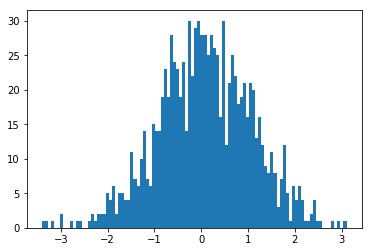

In [36]:
nn = np.random.randn(1000)
plt.hist(nn, bins=100);
#nn

In [52]:
game = tictactoe()
state_arr = game.gen_state_arr()
values = game.gen_value_arr(arr)

TD_x = td_agent(values, 1)
TD_o = td_agent(values, 2)

In [38]:
tmp_inds = game.find_next_move(state_arr, state_arr[0], 1)
tmp_st_inds = game.get_current_state_index(state_arr[0], state_arr)[1]
print(tmp_inds, tmp_st_inds)
TD_x.get_move_update_values(tmp_inds, tmp_st_inds, .1)

[2023, 730, 265, 96, 35, 13, 5, 2, 1] 0


2023

In [25]:
state_arr[1]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [26]:
ts1 = state_arr[0]
# win probability should be 1
ts2 = np.array([1, 0, 1, 2, 2, 0, 1, 0, 2]).reshape(3, 3)
ts3 = np.array([1, 0, 1, 2, 1, 2, 0, 2, 0]).reshape(3, 3)
ts4 = np.array([1, 2, 1, 2, 0, 2, 1, 2, 1]).reshape(3, 3)
ts5 = np.array([2, 0, 0, 2, 1, 0, 1, 1, 2]).reshape(3, 3)
# win probability should be 0
ts6 = np.array([2, 0, 2, 0, 1, 1, 2, 1, 1]).reshape(3, 3)
ts7 = np.array([2, 2, 0, 1, 0, 0, 1, 0, 1]).reshape(3, 3)
ts8 = np.array([2, 0, 2, 1, 2, 1, 1, 1, 0]).reshape(3, 3)
ts9 = np.array([1, 1, 0, 1, 2, 0, 2, 0, 0]).reshape(3, 3)
ts10 = np.array([1, 1, 0, 0, 1, 0, 2, 2, 0]).reshape(3, 3)

ts_inds = []
ts_ = [ts1, ts2, ts3, ts4, ts5, ts6, ts7, ts8, ts9, ts10]
for i in ts_:
    ts_inds.append(game.get_current_state_index(i, state_arr)[1])

In [144]:
for i in range(30000):
    iter_count = 0
    cur_state = state_arr[0]
    while game.check_over(cur_state) == 0.5 and iter_count <= 8:
        cur_state_ind = game.get_current_state_index(cur_state, state_arr)
        #print(cur_state)
        if iter_count % 2 == 0:
            move_inds = game.find_next_move(state_arr, cur_state, 1)
            new_move_ind = TD_x.get_move_update_values(move_inds, cur_state_ind[1], .1)
            #print('X move:', TD_x.vals[new_move_ind])
            cur_state = state_arr[new_move_ind]
            #print(cur_state)
        else:
            move_inds = game.find_next_move(state_arr, cur_state, 2)
            new_move_ind = TD_o.get_move_update_values(move_inds, cur_state_ind[1], .1)
            #print('O move:', TD_o.vals[new_move_ind])
            cur_state = state_arr[new_move_ind]
            #print(cur_state)
        iter_count += 1
    if i%1000 == 0:
        print('X values for test states: ', TD_x.vals[ts_inds])
        np.save('x_game_vals.npy', TD_x.vals)
        np.save('o_game_vals.npy', TD_o.vals)

X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
X values for test states:  [0.5 0.

In [33]:
o_vals = np.load('/Users/jacobpettit/Documents/reinforcement-learning/TD_TicTacToe/o_game_vals.npy')
x_vals = np.load('/Users/jacobpettit/Documents/reinforcement-learning/TD_TicTacToe/x_game_vals.npy')

In [55]:
game.human_play(state_arr, x_vals, TD_x)

[['X' '-' '-']
 ['-' '-' '-']
 ['-' '-' '-']]


Input your move coordinates, separated by a comma:  2, 2


[['X' 'X' '-']
 ['-' '-' '-']
 ['-' '-' 'O']]


Input your move coordinates, separated by a comma:  0, 2


[['X' 'X' 'O']
 ['X' '-' '-']
 ['-' '-' 'O']]


Input your move coordinates, separated by a comma:  2, 0


[['X' 'X' 'O']
 ['X' 'X' '-']
 ['O' '-' 'O']]


Input your move coordinates, separated by a comma:  2, 1


[['X' 'X' 'O']
 ['X' 'X' '-']
 ['O' 'O' 'O']]


### Next Steps

-Need to conduct checks of find_next_move function to try and make sure it is actually finding valid moves.

-Need to write the TD learning portion 

-Come up with way to play against it

-Come up with visualization of algorithm playing

-Train it

-Play against it

## Chapter 2

The following is my notes, summary, and paraphrasing of Chapter 2 in Sutton and Barto's Reinforcement Learning: An Introduction

### Multi-Armed Bandits

"The most important feature distinguishing reinforcement learning from other types of learning is that it uses training information that $evaluates$ the actions taken rather than $instructs$ by giving the correct actions."

If we used feedback that is only evaluating each move, this will tell us how good the action taken was, but not if it was the best or worst action we could've possibly taken.

Using feedback that is just instructive will only tell us the right action to take, regardless of the action that we took.

### 2.1: A $k$-armed Bandit Problem

The problem:

We repeatedly have to choose from among $k$ different actions. After each action, a reward is given, the reward is picked from an unchanging probability distribution that depends on the action chosen. The goal is to maximize the (expected) total reward over an arbitrary time period.

"This is the original form of the k-armed bandit problem, so named by analogy to a slot machine, or "one armed bandit", except that it has $k$ levers instead of one. Each action selection is like a play of one of the slot machine's levers, and the rewards are payoffs for hitting the jackpot. Through repeated action selections you are to maximize your chances of winning by concentrating your actions on the best levers."

